<a href="https://colab.research.google.com/github/git07Sandesh/Pytorch-Practice/blob/main/pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Classification WorkFlow:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"first five samples: {X[:5]}")
print(f"first five labels: {y[:5]}")

X shape: (1000, 2)
y shape: (1000,)
first five samples: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
first five labels: [1 1 1 1 0]


In [ ]:
#Using Pandas Dataframe to visualize data more:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


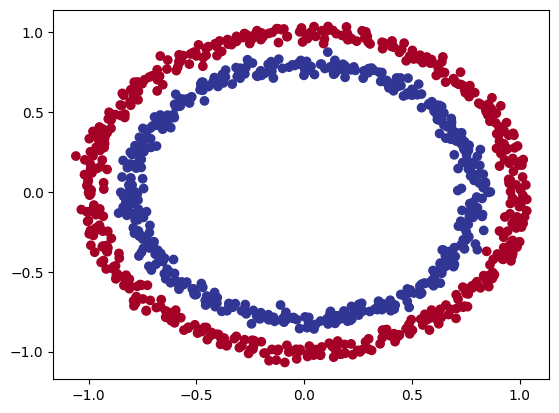

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], y = X[:, 1],
            c = y, cmap=plt.cm.RdYlBu)
#

In [ ]:
#Train test splits:
#First convert it to tensors:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: torch.Size([1000, 2])
y shape: torch.Size([1000])


In [ ]:
#Now splitting the data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

In [ ]:
#Now let's build the model:
import torch
from torch import nn

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in two features and creates a layer of 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  def forward(self, x):
    return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0()
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# We can use another method using Sequential:

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

Understanding how to create the sub class using nn.Module allows more flexibility while working with the model.


In [ ]:
#Let's make some predictions with our model:

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0595, -0.4382],
                      [ 0.0948,  0.2734],
                      [-0.2304, -0.2100],
                      [-0.3906, -0.4539],
                      [ 0.1040, -0.3852]])),
             ('0.bias', tensor([ 0.5604,  0.6725,  0.4155,  0.2205, -0.6048])),
             ('1.weight',
              tensor([[ 0.1208,  0.2256,  0.3851, -0.0107, -0.1114]])),
             ('1.bias', tensor([-0.1098]))])

In [ ]:
with torch.inference_mode():
  untrained_preds = model_0(X_test[:5])
untrained_preds, y_test[:5]

(tensor([[0.3488],
         [0.3100],
         [0.3999],
         [0.3345],
         [0.3197]]),
 tensor([1., 0., 1., 0., 1.]))

In [ ]:
# Now we will first use loss function and optimizer:

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr= 0.1)



In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0595, -0.4382],
                      [ 0.0948,  0.2734],
                      [-0.2304, -0.2100],
                      [-0.3906, -0.4539],
                      [ 0.1040, -0.3852]])),
             ('0.bias', tensor([ 0.5604,  0.6725,  0.4155,  0.2205, -0.6048])),
             ('1.weight',
              tensor([[ 0.1208,  0.2256,  0.3851, -0.0107, -0.1114]])),
             ('1.bias', tensor([-0.1098]))])

In [ ]:
#Calculating Accuracy as well:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc



In [ ]:
y_logits = model_0(X_train).squeeze()
y_pred_probs = torch.round(torch.sigmoid(y_logits))
y_pred_labels = torch.round(y_pred_probs)


In [ ]:
#Now we will build a training looop:

In [ ]:
torch.manual_seed(42)
epochs = 100

for epoch in range(epochs):
  #Setting up the training mode:
  model_0.train()
  #Logits are our prediction before passing to Sigmoid functions: Why currently the values are random 0.6894 or similar but we need 0 or 1
  #Forward Pass.
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #turns logit -> pred_probs->labels

  #Calculate the loss:
  loss = loss_fn(y_logits, y_train)

  #CAlculate accuracy:
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  #Optimize the model:
  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing:
  model_0.eval()
  with torch.inference_mode():
    #1. FOrward Pass: Just like the training forward pass:
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    #2. Loss and accuracy of testing:
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    #3. Print out what is happening:
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.70781 | Acc: 50.00% | Test Loss: 0.70423 | Test Acc: 50.00%
Epoch: 10 | Loss: 0.69734 | Acc: 50.00% | Test Loss: 0.69568 | Test Acc: 50.00%
Epoch: 20 | Loss: 0.69446 | Acc: 50.00% | Test Loss: 0.69353 | Test Acc: 50.00%
Epoch: 30 | Loss: 0.69362 | Acc: 50.00% | Test Loss: 0.69306 | Test Acc: 50.00%
Epoch: 40 | Loss: 0.69335 | Acc: 52.75% | Test Loss: 0.69303 | Test Acc: 55.00%
Epoch: 50 | Loss: 0.69325 | Acc: 50.12% | Test Loss: 0.69312 | Test Acc: 55.50%
Epoch: 60 | Loss: 0.69320 | Acc: 50.12% | Test Loss: 0.69323 | Test Acc: 53.50%
Epoch: 70 | Loss: 0.69317 | Acc: 49.88% | Test Loss: 0.69334 | Test Acc: 54.00%
Epoch: 80 | Loss: 0.69314 | Acc: 49.38% | Test Loss: 0.69344 | Test Acc: 51.50%
Epoch: 90 | Loss: 0.69312 | Acc: 49.75% | Test Loss: 0.69354 | Test Acc: 49.50%


In [ ]:
# WHy is the model not Learning. Inspect it:
#Visualize, visualize, visualize:

import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('helper_functions.py already exists, skipping download')
else:
  print('Downloading helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary

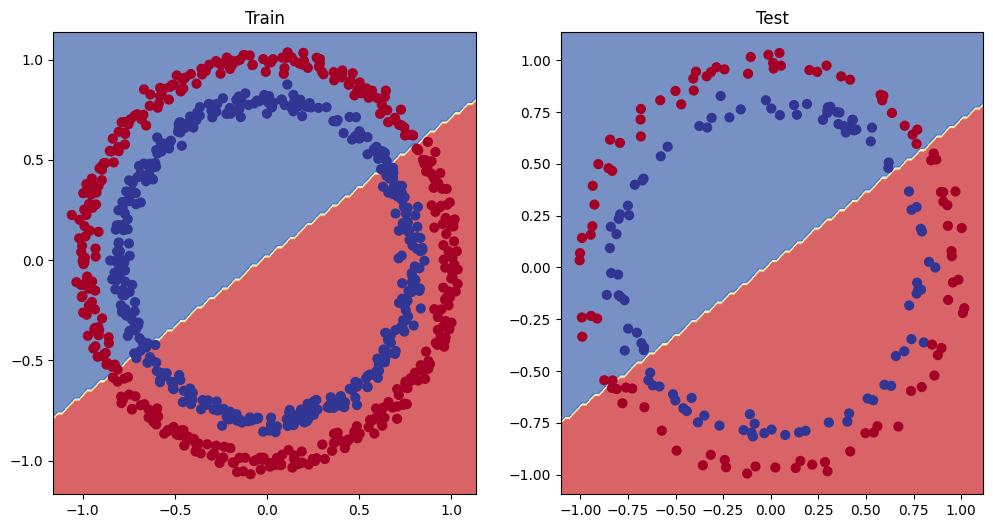

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_0, X_test, y_test)

#5. Improving our model:
* Add more layers:
* Add more hidden layer:
* Change the activation function:
* Change the learning rate
* Change the number of epochs

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)

    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))
model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#Create a loss function and optimizer:
loss_fn1 = nn.BCEWithLogitsLoss()
optimizer1 = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


In [ ]:
torch.manual_seed(42)
# DOing a training loop:
epochs = 1000
for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn1(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer1.zero_grad()
  loss.backward()
  optimizer1.step()

  model_1.eval()
  with torch.inference_mode():

    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn1(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 10 | Loss: 0.69369 | Acc: 50.25% | Test Loss: 0.69270 | Test Acc: 50.00%
Epoch: 20 | Loss: 0.69351 | Acc: 50.12% | Test Loss: 0.69283 | Test Acc: 49.50%
Epoch: 30 | Loss: 0.69339 | Acc: 50.50% | Test Loss: 0.69297 | Test Acc: 48.00%
Epoch: 40 | Loss: 0.69329 | Acc: 50.38% | Test Loss: 0.69310 | Test Acc: 49.00%
Epoch: 50 | Loss: 0.69322 | Acc: 49.88% | Test Loss: 0.69324 | Test Acc: 50.00%
Epoch: 60 | Loss: 0.69317 | Acc: 49.38% | Test Loss: 0.69336 | Test Acc: 51.50%
Epoch: 70 | Loss: 0.69312 | Acc: 49.38% | Test Loss: 0.69348 | Test Acc: 50.50%
Epoch: 80 | Loss: 0.69309 | Acc: 50.12% | Test Loss: 0.69359 | Test Acc: 50.00%
Epoch: 90 | Loss: 0.69307 | Acc: 50.50% | Test Loss: 0.69370 | Test Acc: 48.50%
Epoch: 100 | Loss: 0.69305 | Acc: 50.38% | Test Loss: 0.69379 | Test Acc: 48.00%
Epoch: 110 | Loss: 0.69303 | Acc: 50.88% | Test Loss: 0.69388 | Test Acc: 46.50%
Epoch: 120 | Loss: 0.69302 | Acc: 50.75

In [ ]:
#THe missing piece is non-linearity:
#Building a non-linear model:
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features= 1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#COding the training and testing loop:
loss_fn3 = nn.BCEWithLogitsLoss()
optimizer3 = torch.optim.SGD(params=model_3.parameters(), lr=0.05)

torch.manual_seed(42)

epochs = 2000
for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn3(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
  optimizer3.zero_grad()
  loss.backward()
  optimizer3.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn3(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.08000 | Acc: 99.88% | Test Loss: 0.11377 | Test Acc: 99.50%
Epoch: 100 | Loss: 0.07101 | Acc: 99.88% | Test Loss: 0.10332 | Test Acc: 99.50%
Epoch: 200 | Loss: 0.06373 | Acc: 99.88% | Test Loss: 0.09439 | Test Acc: 99.50%
Epoch: 300 | Loss: 0.05775 | Acc: 99.88% | Test Loss: 0.08681 | Test Acc: 99.50%
Epoch: 400 | Loss: 0.05276 | Acc: 99.88% | Test Loss: 0.08039 | Test Acc: 99.50%
Epoch: 500 | Loss: 0.04854 | Acc: 99.88% | Test Loss: 0.07482 | Test Acc: 99.50%
Epoch: 600 | Loss: 0.04492 | Acc: 99.88% | Test Loss: 0.07000 | Test Acc: 100.00%
Epoch: 700 | Loss: 0.04177 | Acc: 99.88% | Test Loss: 0.06589 | Test Acc: 100.00%
Epoch: 800 | Loss: 0.03890 | Acc: 99.88% | Test Loss: 0.06260 | Test Acc: 100.00%
Epoch: 900 | Loss: 0.03630 | Acc: 99.88% | Test Loss: 0.05980 | Test Acc: 100.00%
Epoch: 1000 | Loss: 0.03404 | Acc: 99.88% | Test Loss: 0.05718 | Test Acc: 100.00%
Epoch: 1100 | Loss: 0.03206 | Acc: 99.88% | Test Loss: 0.05464 | Test Acc: 100.00%
Epoch: 1200 | Loss: 0.

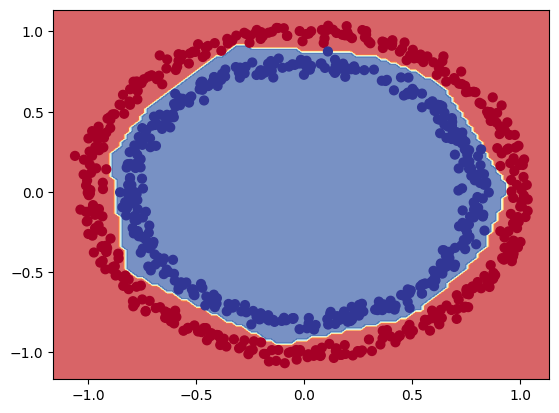

In [ ]:
plot_decision_boundary(model_3, X_train, y_train)

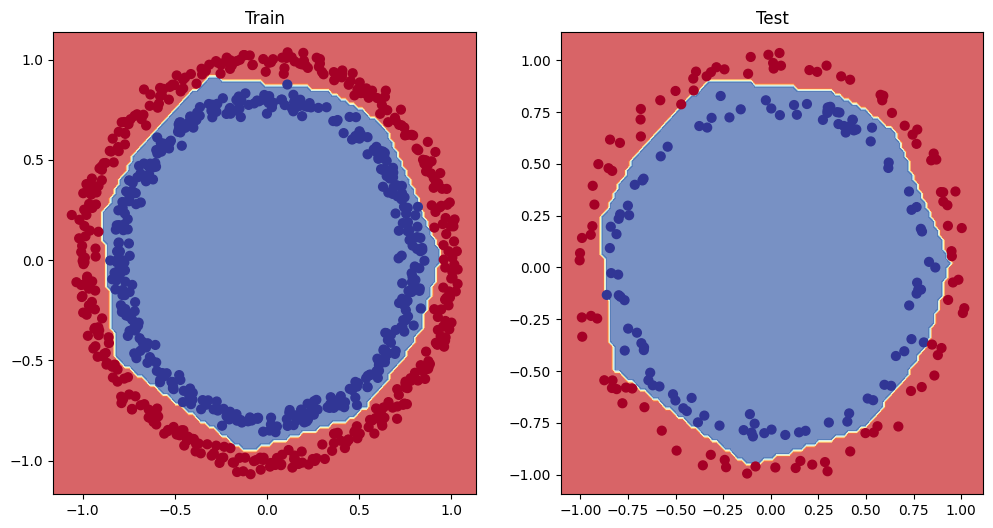

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_3, X_test, y_test)

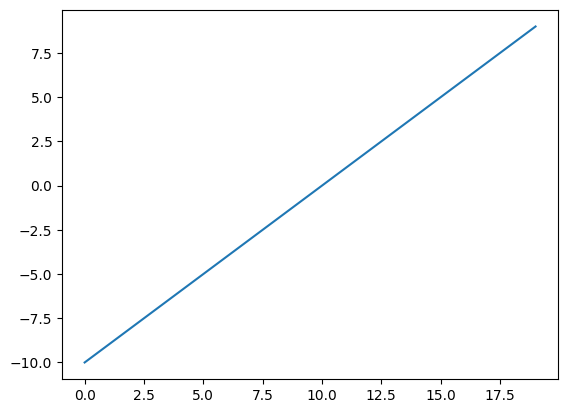

In [ ]:
#Now let's replicate it:
#Create a tensors:

A = torch.arange(-10, 10, 1)
plt.plot(A)

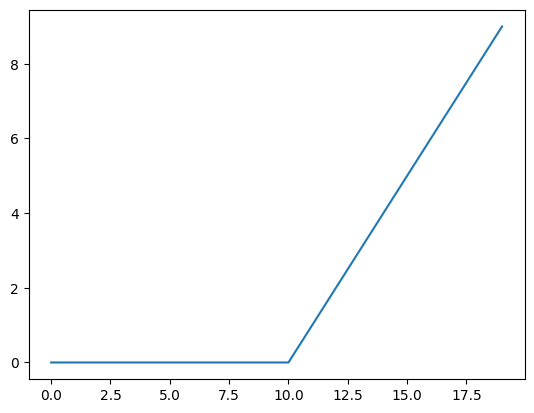

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
#Putting it all together with multi-class classification:

#Steps: 1. Get Data

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X,y = make_blobs(n_samples = 1000, n_features = 2, centers = 4, cluster_std = 1.5, random_state = 42)
#Scikit learn has data in form of numpy arrays, we need to convert it to tensors to use pytorch.

x_blob = torch.from_numpy(X).type(torch.float)
y_blob = torch.from_numpy(y).type(torch.LongTensor)



In [ ]:
x_blob.dtype, y_blob.dtype


(torch.float32, torch.int64)

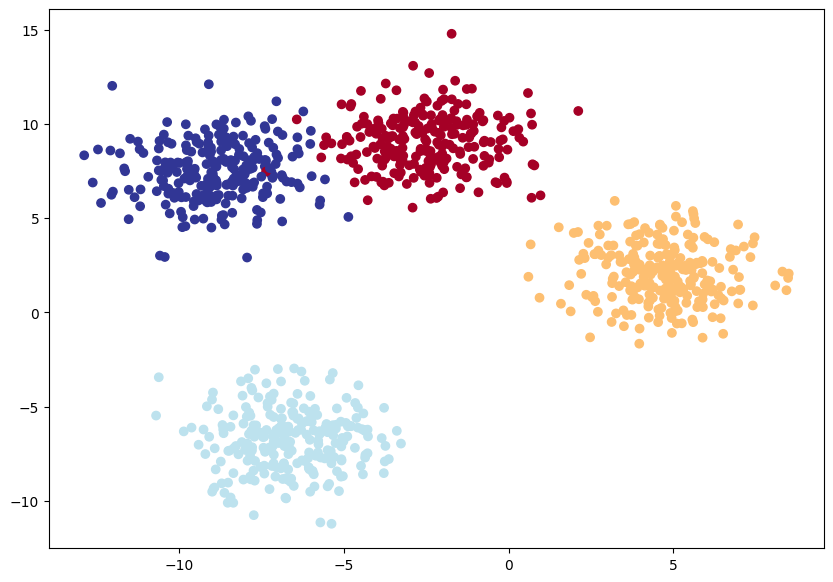

In [ ]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(x_blob, y_blob, test_size=0.2, random_state=42)
plt.figure(figsize=(10,7))
plt.scatter(x=x_blob[:, 0], y=x_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
## Building the model
class BlobModel(nn.Module):
  def __init__(self):
    super().__init__()
    #self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    #self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    #self.layer_3 = nn.Linear(in_features = 10, out_features = 4)
    #self.relu = nn.Relu()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=2, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=4)
    )
  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel()
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=4, bias=True)
  )
)

In [ ]:
# OK now we need loss function, and optimizer:

loss_fn4 = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr = 0.05)

# Let's get predictions from our untrained model:
model_4.eval()
with torch.inference_mode():
  untrained_preds = model_4(X_blob_test)
untrained_preds

tensor([[ 0.2278,  0.3711,  0.8627, -0.3775],
        [-0.1974,  0.1331,  0.1715, -0.1909],
        [ 0.0566,  0.1291,  0.0878, -0.1532],
        [ 0.0073,  0.1208,  0.5334, -0.3750],
        [-0.0646,  0.5400,  0.5424, -0.4671],
        [-0.2360,  0.1630,  0.2006, -0.2212],
        [-0.0572,  0.0332,  0.0267, -0.1793],
        [-0.2211,  0.4117,  0.2884, -0.4357],
        [ 0.0806,  0.1887,  0.1318, -0.1588],
        [-0.1619,  0.4812,  0.3719, -0.4377],
        [-0.2212,  0.3237,  0.2233, -0.3516],
        [ 0.2214,  0.3535,  0.9775, -0.4353],
        [-0.1174,  0.5373,  0.4813, -0.4710],
        [-0.2118,  0.5225,  0.3666, -0.4885],
        [-0.2041,  0.5895,  0.4386, -0.5193],
        [-0.1851,  0.1256,  0.1631, -0.1824],
        [-0.2019,  0.1372,  0.1752, -0.1948],
        [ 0.0306,  0.1401,  0.1445, -0.1655],
        [-0.2420,  0.1726,  0.2068, -0.2289],
        [-0.1817,  0.1272,  0.1620, -0.1821],
        [-0.2221,  0.1885,  0.1978, -0.2393],
        [-0.1778,  0.2958,  0.2153

In [ ]:
#Now we need training loop:
torch.manual_seed(42)

epochs = 100
for epoch in range(epochs):
  #Setting the training model
  model_4.train()

  #Note that we need to convert our prediction from random number to logits to prediction probablities and subsequently labels
  #This is where we need our activation function:

  y_logits = model_4(X_blob_train).squeeze()
  y_pred_probs = torch.softmax(y_logits, dim=1)
  y_pred = torch.argmax(y_pred_probs, dim=1)
  #Bring on the loss function and calculate the accuracy:
  loss = loss_fn4(y_logits, y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #SEtting testing loop:

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test).squeeze()
    test_pred = torch.softmax(test_logits, dim=1)
    test_pred_labels = torch.argmax(test_pred, dim=1)
    test_loss = loss_fn4(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred_labels)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.50867 | Acc: 2.75% | Test Loss: 1.43813 | Test Acc: 2.50%
Epoch: 10 | Loss: 1.26802 | Acc: 40.38% | Test Loss: 1.27643 | Test Acc: 41.50%
Epoch: 20 | Loss: 1.03008 | Acc: 51.00% | Test Loss: 1.05064 | Test Acc: 44.50%
Epoch: 30 | Loss: 0.74932 | Acc: 71.50% | Test Loss: 0.76856 | Test Acc: 67.50%
Epoch: 40 | Loss: 0.52826 | Acc: 89.38% | Test Loss: 0.54208 | Test Acc: 92.50%
Epoch: 50 | Loss: 0.42361 | Acc: 95.12% | Test Loss: 0.43676 | Test Acc: 94.00%
Epoch: 60 | Loss: 0.34986 | Acc: 99.00% | Test Loss: 0.35890 | Test Acc: 98.50%
Epoch: 70 | Loss: 0.27467 | Acc: 99.00% | Test Loss: 0.27695 | Test Acc: 99.50%
Epoch: 80 | Loss: 0.19516 | Acc: 99.00% | Test Loss: 0.19202 | Test Acc: 99.50%
Epoch: 90 | Loss: 0.13372 | Acc: 99.00% | Test Loss: 0.12833 | Test Acc: 99.50%


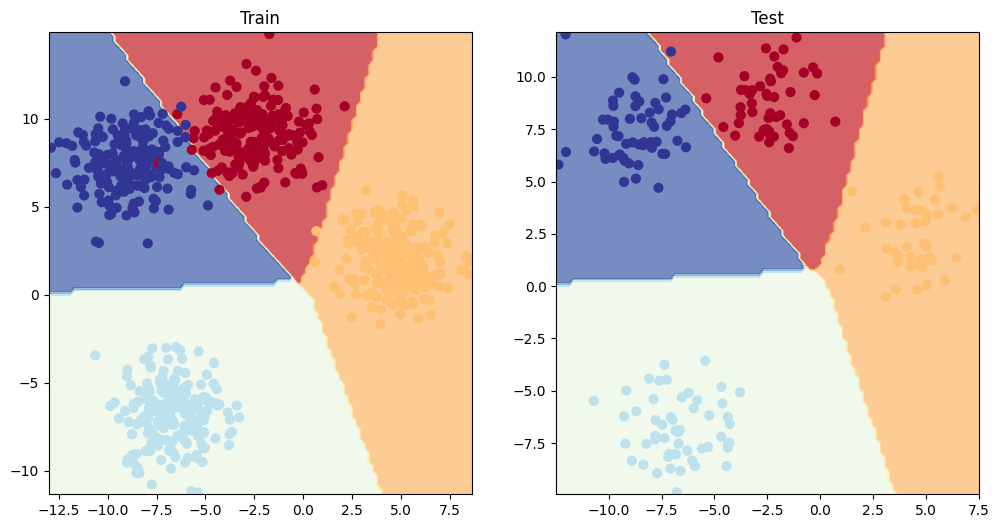

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [ ]:
#Measurements and accuracy